# Regression

## Linear Regression

In [1]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [122]:
# reshape the X so it is a 2D array, which sklearn model usually expect
X = iris['data'][:,3].reshape(-1, 1) # petal width (cm)
y = iris['data'][:,2] # petal length (cm)

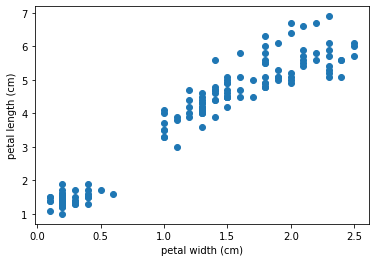

In [123]:
plt.scatter(X, y)
plt.xlabel(iris['feature_names'][3])
plt.ylabel(iris['feature_names'][2])
plt.show()

In [124]:
# import regression from sklearn
from sklearn.linear_model import LinearRegression

In [125]:
# fit/train the model using the data
reg = LinearRegression().fit(X, y)

In [126]:
print('score:', reg.score(X, y))
print('coef:', reg.coef_)
print('intercept:', reg.intercept_)

score: 0.9271098389904927
coef: [2.2299405]
intercept: 1.0835580328505112


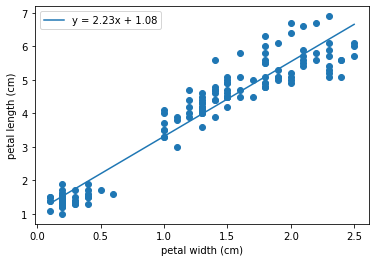

In [127]:
plt_x = np.linspace(X[:,0].min(), X[:,0].max(), 2)
plt_y = plt_x * reg.coef_[0] + reg.intercept_
plt.scatter(X, y)
plt.plot(plt_x, plt_y, label=f'y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}')
plt.xlabel(iris['feature_names'][3])
plt.ylabel(iris['feature_names'][2])
plt.legend()
plt.show()

## Multiple Linear Regression

With scikit-learn, simple or multiple linear regression works exactly the same

In [138]:
# reshape the X so it is a 2D array, which sklearn model usually expect
X = iris['data'][:,0:3] # 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
y = iris['data'][:,3] # petal width (cm)

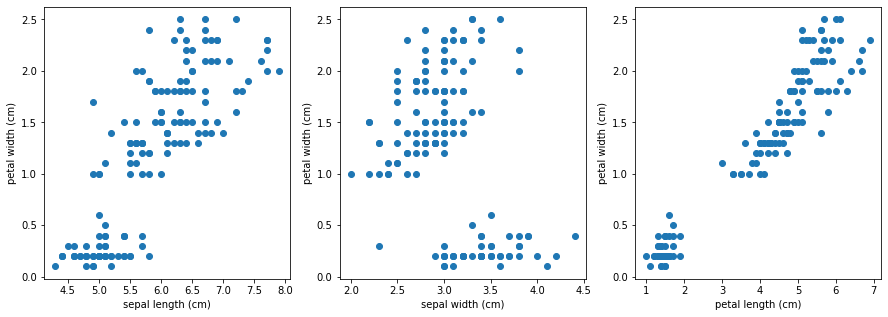

In [129]:
fig, axs = plt.subplots(1,len(X[0]), figsize=(15,5))
for i in range(len(X[0])):
    axs[i].scatter(X[:, i], y)
    axs[i].set_xlabel(iris['feature_names'][i])
    axs[i].set_ylabel(iris['feature_names'][3])
plt.show()

In [139]:
# fit/train the model using the data
reg = LinearRegression().fit(X, y)

In [154]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print('score:', reg.score(X, y))
print('coef:', reg.coef_)
print('intercept:', reg.intercept_)
print('equation: y = ' + ' + '.join([f'{reg.coef_[i]:.2f}x{str(i).translate(SUB)}' for i in range(len(reg.coef_))]))

score: 0.9378502736046809
coef: [-0.20726607  0.22282854  0.52408311]
intercept: -0.2403073891122629
equation: y = -0.21x₀ + 0.22x₁ + 0.52x₂


### Multicollinearity
Checking the relevance of each individual variable separetly by performing simple linear regression

0: score: 0.6690276860464137
1: score: 0.13404819847567717
2: score: 0.9271098389904927


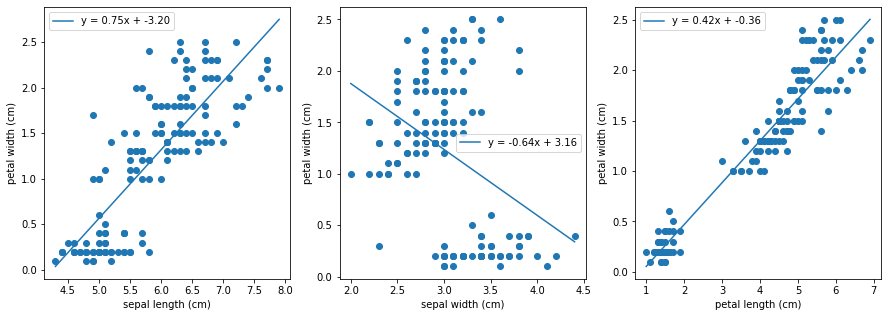

In [137]:
fig, axs = plt.subplots(1,len(X[0]), figsize=(15,5))
for i in range(len(X[0])):
    reg_X = X[:, i].reshape(-1, 1)
    reg = LinearRegression().fit(reg_X, y)
    axs[i].scatter(reg_X, y)
    axs[i].set_xlabel(iris['feature_names'][i])
    axs[i].set_ylabel(iris['feature_names'][3])
    plt_x = np.linspace(reg_X.min(), reg_X.max(), 2)
    plt_y = plt_x * reg.coef_[0] + reg.intercept_
    axs[i].plot(plt_x, plt_y, label=f'y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}')
    axs[i].legend()
    print(f'{i}: score:', reg.score(reg_X, y))
plt.show()

Check the correlations between all paris of variable

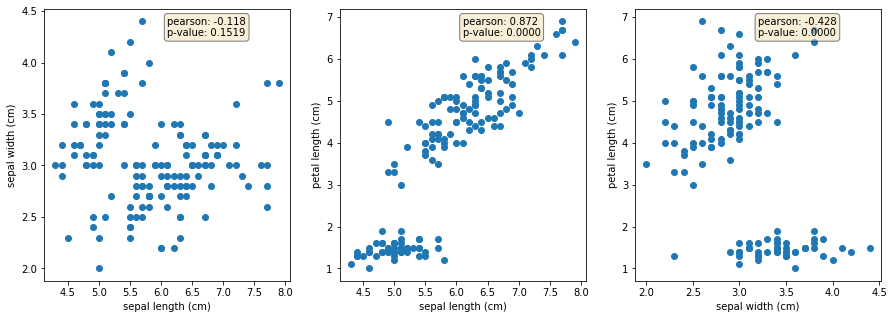

In [201]:
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
fig, axs = plt.subplots(1,len(X[0]), figsize=(15,5))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
for i in range(len(X[0])):
    for j in range(i+1, len(X[0])):
        k = i+j-1
        corr = pearsonr(X[:, i], X[:, j])
        axs[k].scatter(X[:, i], X[:, j])
        axs[k].set_xlabel(iris['feature_names'][i])
        axs[k].set_ylabel(iris['feature_names'][j])
        text = f'pearson: {corr[0]:.3f}\np-value: {corr[1]:.4f}'
        axs[k].text(0.5, 0.9, text, transform=axs[k].transAxes, bbox=props)
plt.show()

In [237]:
res = []
data = iris['data']
for i in range(len(data[0])):
    tmp = []
    for j in range(len(data[0])):
        tmp.append(pearsonr(data[i], data[j])[0])
    res.append(tmp)

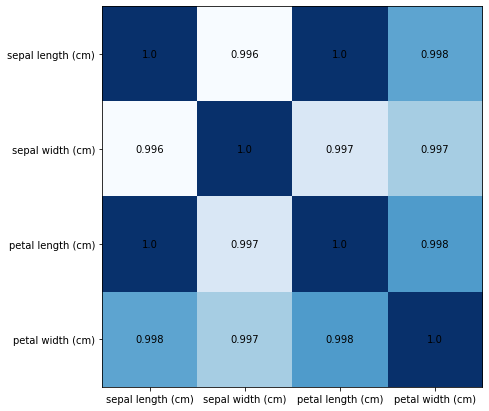

In [238]:
plt.figure(figsize=(7,7))
plt.imshow(res, cmap=plt.cm.Blues)
plt.xticks(np.arange(len(data[0])), iris['feature_names'])
plt.yticks(np.arange(len(data[0])), iris['feature_names'])
for i in range(len(res)):
    for j in range(len(res)):
        text = plt.text(j, i, round(res[i][j], 3),
                       ha="center", va="center", color="black")